In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
leads=pd.read_csv("C:\\Users\\User\\Desktop\\upgrad\\Lead Scoring Assignment\\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [6]:
#dropping Lead Number and Prospect ID as they have unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [7]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [8]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [9]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [11]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [12]:
#Categorical variable analysis
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

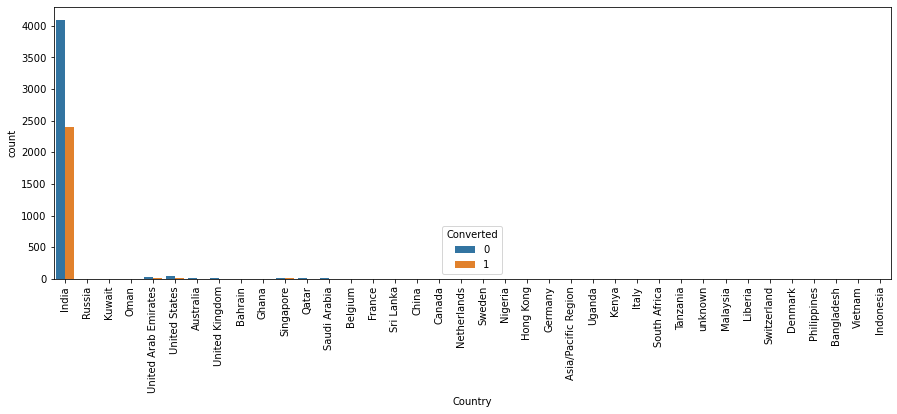

In [13]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [14]:
# As India is the most common among the non-missing values we can impute all missing values with India

leads['Country'] = leads['Country'].replace(np.nan,'India')

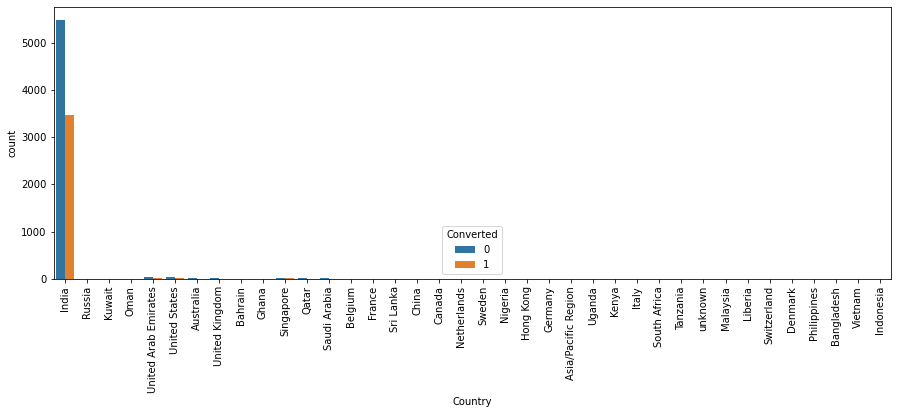

In [15]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [16]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [17]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

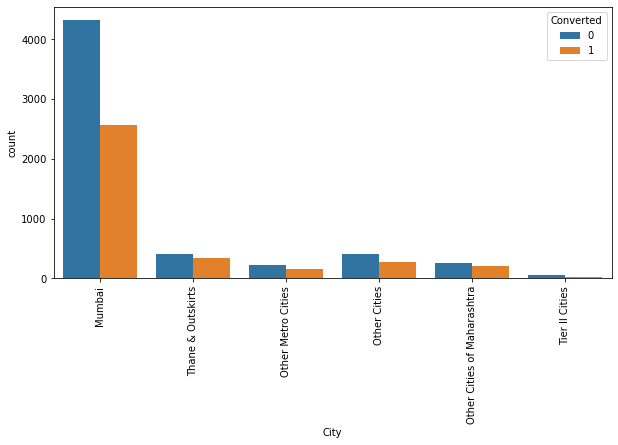

In [19]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [20]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

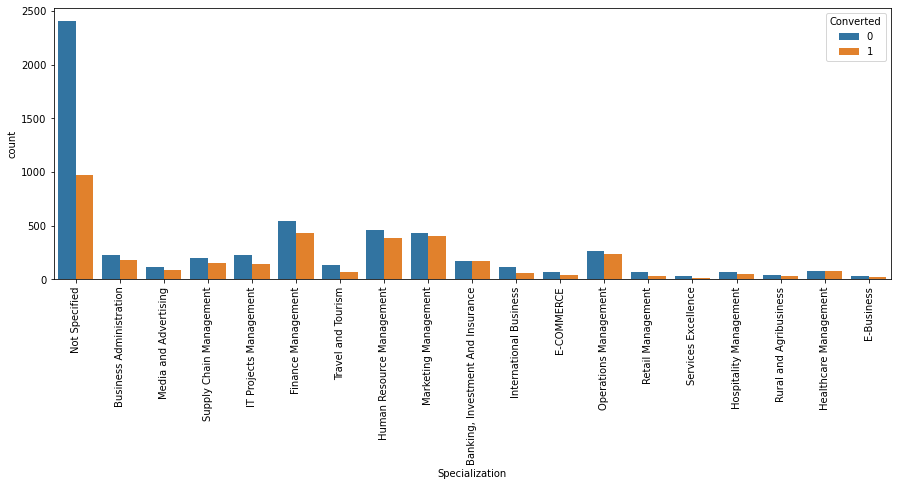

In [22]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
# current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#imputing Nan values with mode "Unemployed" 
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [25]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

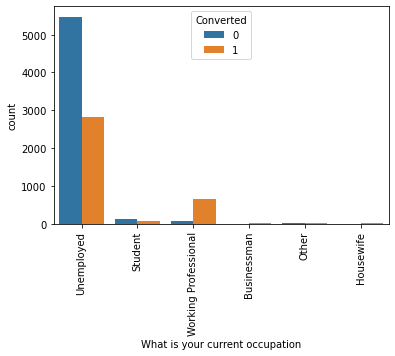

In [26]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
#replacing Nan values with Mode "Better Career Prospects as it has higher proportion"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

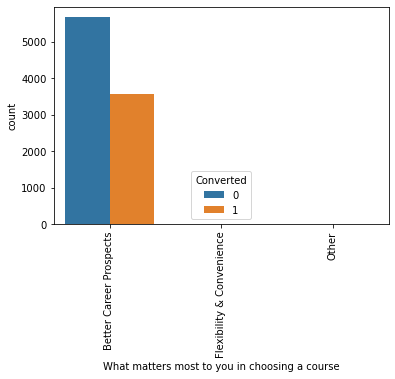

In [29]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [32]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [33]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

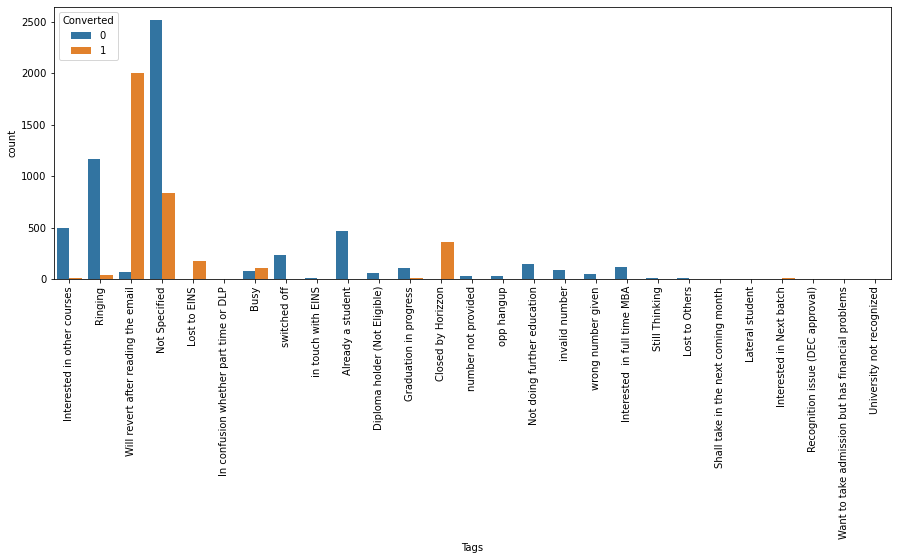

In [34]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [36]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [37]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

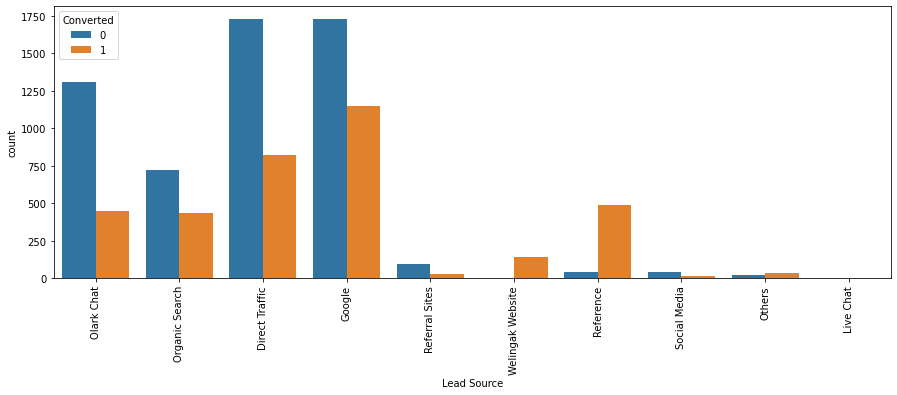

In [39]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
#We can see majorityof leads are generated by Google and Direct traffic.
#welingak website is high in terms of reference leads.
#There shoud be more focus on improving lead converion of olark chat, organic search, direct traffic, and google leads

In [41]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [42]:
#replacing Nan Values and grouping low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [43]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [44]:
#Checking the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [45]:
#Drop all rows which have Nan Values. 
leads = leads.dropna()

In [46]:
#Checking % of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [47]:
#Lead Origin value counts
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

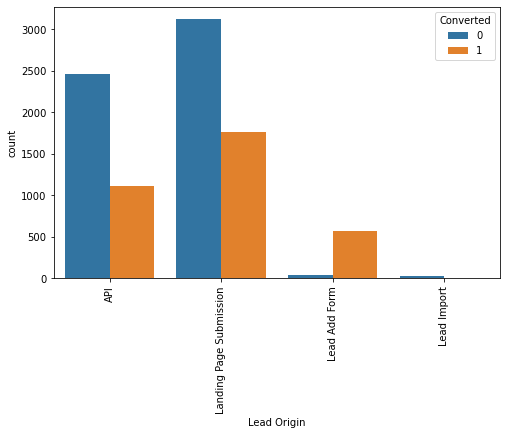

In [48]:
#visualization based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [49]:
#Interpretation
#API and Landing Page Submission lead to higher number of leads and conversion.
#Lead Add Form shows high conversion rate however count of leads are not very high.
#Lead Import and Quick Add Form may not result in more leads.
#To improve overall lead conversion rate, there should be more focus on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

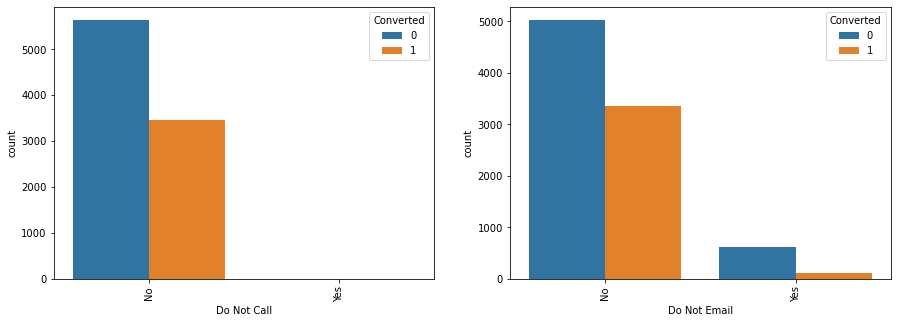

In [50]:
#Checking Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [51]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [52]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [53]:
#We can drop  Do Not Call Column and add to the list of Columns to be Dropped as > 90% is of only one Value

In [54]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [55]:
# Checking for IMBALANCED VARIABLES THAT CAN BE DROPPED
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [56]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [57]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [60]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [62]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [63]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [64]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [65]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [66]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [67]:
#We can add imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [68]:
#check value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [69]:
#combining lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

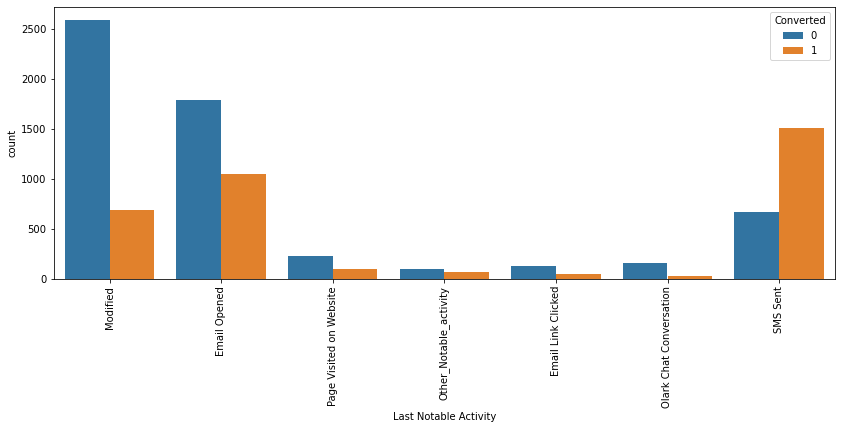

In [70]:
#visualizing count of Variable based on Converted value
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [71]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [72]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [73]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [74]:
#Numerical variable Analysis:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

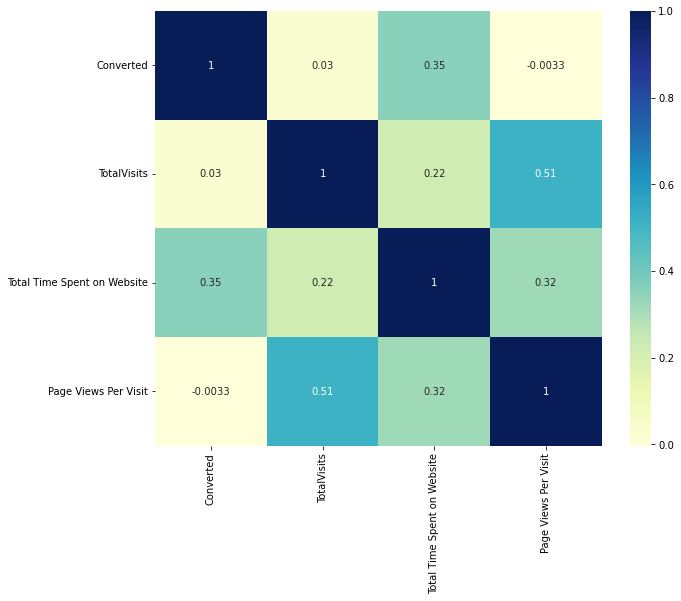

In [75]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

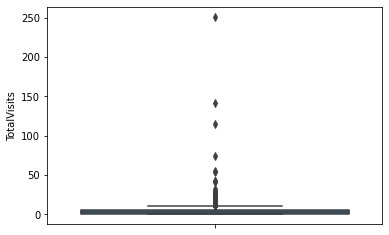

In [76]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [77]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

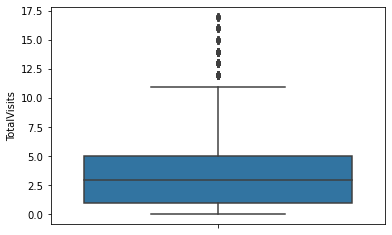

In [78]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [79]:
leads.shape

(9020, 14)

In [80]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

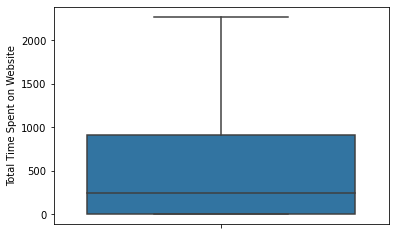

In [81]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [82]:
#there are no outliers for this variables

In [83]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()


count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

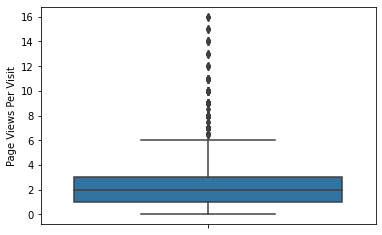

In [84]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

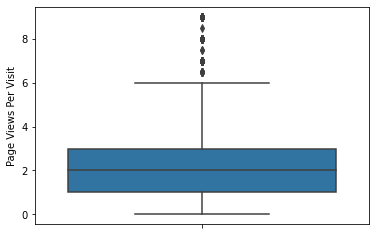

In [85]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [86]:
leads.shape

(8953, 14)

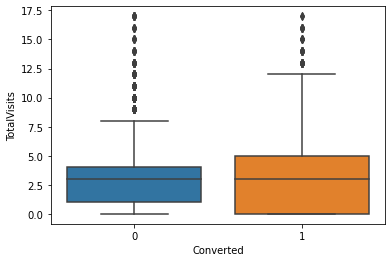

In [87]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [88]:
#Inference

#Medians seem to be closer for converted and not converted leads

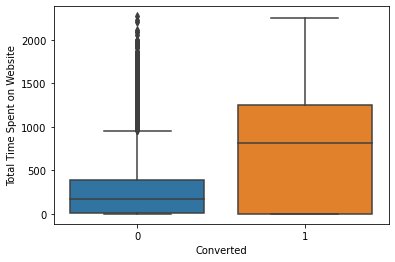

In [89]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

In [90]:
#Inference

#Leads getting engaged on the website are more likely to be converted.
# Website should be made more attractive or engaging to get the conversion

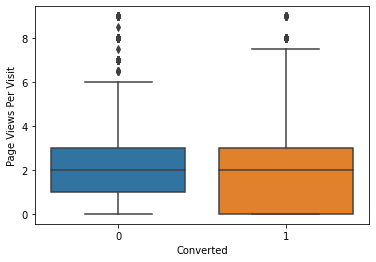

In [91]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [92]:
#Medians for both the categories are almost same

In [93]:
#checking missing values in remaining columns

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [94]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [96]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [97]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [103]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
#Train-Test Split & Logistic Regression Model Building:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [107]:
#Scaling of Data:
#scaling numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [108]:
#Model Building using Stats Model & RFE:
import statsmodels.api as sm

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('What is your current occupation_Housewife', False, 4),
 ('What is your current occupation_Other', False, 4),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 3),
 ('City_Other Cities of Maharashtra', False, 4),
 ('City_Other Metro Cities', False, 4),
 ('City_Thane & Outskirts', False, 4),
 ('City_Tier II Cities', False, 3),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 3),
 ('Specialization_Finance Management', False, 4),
 ('Specializat

In [112]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last No

In [113]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
 

In [114]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.6
Date:                Sun, 05 Mar 2023   Deviance:                       2373.1
Time:                        23:16:04   Pearson chi2:                 7.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6133
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2260      0.367     -0.616      0.538      -0.945       0.493
Total Time Spent on Website                              1.0933      0.062     17.511      0.000       0.971       1.216
Lead Origin_Landing Page Submission                     -0.7872      0.157     -5.019      0.000      -1.095      -0.480
Lead Origin_Lead Add Form                                1.5574      1.022      1.523      0.128      -0.447       3.561
What is your current occupation_Working Professional     0.9764      0.414      2.358      0.018       0.165       1.788
Specialization_Banking, Investment And Insurance         0.5220      0.306      1.707      0.088      -0.077       1.121
Specialization_Healthcare Management                    -0.5458      0.455     -1.199      0.230      -1.438       0.346
Specialization_Marketing Management                      0.3856      0.212      1.815      0.070      -0.031       0.802
Specialization_Travel and Tourism                       -0.8528      0.482     -1.768      0.077      -1.798       0.093
Lead Source_Direct Traffic                              -1.1098      0.224     -4.964      0.000      -1.548      -0.672
Lead Source_Google                                      -0.8274      0.180     -4.603      0.000      -1.180      -0.475
Lead Source_Organic Search                              -0.8691      0.216     -4.022      0.000      -1.293      -0.446
Lead Source_Reference                                   -0.9790      1.132     -0.865      0.387      -3.198       1.240
Lead Source_Referral Sites                              -1.2508      0.490     -2.550      0.011      -2.212      -0.290
Lead Source_Welingak Website                             3.4291      1.440      2.381      0.017       0.606       6.252
Last Activity_Converted to Lead                         -0.7826      0.480     -1.631      0.103      -1.723       0.158
Last Activity_Email Bounced                             -1.3593      0.573     -2.373      0.018      -2.482      -0.236
Last Activity_Email Opened                              -0.1121      0.350     -0.321      0.749      -0.797       0.573
Last Activity_Form Submitted on Website                  0.2116      0.593      0.357      0.721      -0.950       1.373
Last Activity_Olark Chat Conversation                   -1.2896      0.430     -2.997      0.003      -2.133      -0.446
Last Activity_Page Visited on Website                   -0.8063      0.415     -1.942      0.052      -1.620       0.007
Last Activity_SMS Sent                                   0.7815      0.390      2.001      0.045       0.016       1.547
Last Notable Activity_Email Link Clicked                -1

In [115]:
#dropping column with high p-value
clstodrop = ['Last Activity_Email Opened', 'Last Activity_Email Opened', 'Last Activity_Email Opened', 'Lead Source_Reference', 'Lead Source_Reference']

col = col.drop(clstodrop, 1)


In [116]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1187.0
Date:                Sun, 05 Mar 2023   Deviance:                       2374.0
Time:                        23:16:04   Pearson chi2:                 7.92e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3354      0.131     -2.559      0.011      -0.592      -0.078
Total Time Spent on Website                              1.0930      0.062     17.510      0.000       0.971       1.215
Lead Origin_Landing Page Submission                     -0.7855      0.157     -5.012      0.000      -1.093      -0.478
Lead Origin_Lead Add Form                                0.7830      0.465      1.683      0.092      -0.129       1.695
What is your current occupation_Working Professional     0.9717      0.413      2.350      0.019       0.161       1.782
Specialization_Banking, Investment And Insurance         0.5202      0.306      1.700      0.089      -0.080       1.120
Specialization_Healthcare Management                    -0.5443      0.455     -1.197      0.231      -1.435       0.347
Specialization_Marketing Management                      0.3919      0.212      1.846      0.065      -0.024       0.808
Specialization_Travel and Tourism                       -0.8503      0.482     -1.764      0.078      -1.795       0.095
Lead Source_Direct Traffic                              -1.1079      0.223     -4.958      0.000      -1.546      -0.670
Lead Source_Google                                      -0.8249      0.180     -4.593      0.000      -1.177      -0.473
Lead Source_Organic Search                              -0.8652      0.216     -4.007      0.000      -1.288      -0.442
Lead Source_Referral Sites                              -1.2359      0.488     -2.531      0.011      -2.193      -0.279
Lead Source_Welingak Website                             4.2082      1.116      3.771      0.000       2.021       6.395
Last Activity_Converted to Lead                         -0.6948      0.389     -1.786      0.074      -1.457       0.068
Last Activity_Email Bounced                             -1.2652      0.485     -2.606      0.009      -2.217      -0.314
Last Activity_Form Submitted on Website                  0.2985      0.521      0.572      0.567      -0.724       1.320
Last Activity_Olark Chat Conversation                   -1.2007      0.321     -3.736      0.000      -1.831      -0.571
Last Activity_Page Visited on Website                   -0.7077      0.272     -2.599      0.009      -1.241      -0.174
Last Activity_SMS Sent                                   0.8645      0.270      3.202      0.001       0.335       1.394
Last Notable Activity_Email Link Clicked                -1.3845      0.482     -2.875      0.004      -2.328      -0.441
Last Notable Activity_Modified                          -0.8997      0.200     -4.501      0.000      -1.292      -0.508
Last Notable Activity_Olark Chat Conversation           -1

In [117]:
#there are few more cols with high p value
clstodrp1 = ['Last Activity_Form Submitted on Website', 'Last Notable Activity_Olark Chat Conversation', 'Lead Origin_Lead Add Form', 'Specialization_Banking, Investment And Insurance', 'Specialization_Healthcare Management', 'Specialization_Marketing Management', 'Specialization_Travel and Tourism', 'Last Activity_Converted to Lead']
col = col.drop(clstodrp1, 1)

In [118]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sun, 05 Mar 2023   Deviance:                       2398.3
Time:                        23:16:04   Pearson chi2:                 8.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3106      0.127     -2.442      0.015      -0.560      -0.061
Total Time Spent on Website                              1.0833      0.062     17.527      0.000       0.962       1.204
Lead Origin_Landing Page Submission                     -0.7420      0.151     -4.909      0.000      -1.038      -0.446
What is your current occupation_Working Professional     0.9891      0.418      2.368      0.018       0.171       1.808
Lead Source_Direct Traffic                              -1.1882      0.220     -5.400      0.000      -1.620      -0.757
Lead Source_Google                                      -0.8656      0.176     -4.932      0.000      -1.210      -0.522
Lead Source_Organic Search                              -0.9986      0.213     -4.695      0.000      -1.416      -0.582
Lead Source_Referral Sites                              -1.2979      0.480     -2.706      0.007      -2.238      -0.358
Lead Source_Welingak Website                             4.9402      1.024      4.826      0.000       2.934       6.946
Last Activity_Email Bounced                             -1.2018      0.473     -2.539      0.011      -2.129      -0.274
Last Activity_Olark Chat Conversation                   -1.4988      0.253     -5.926      0.000      -1.995      -1.003
Last Activity_Page Visited on Website                   -0.6920      0.266     -2.605      0.009      -1.213      -0.171
Last Activity_SMS Sent                                   0.9188      0.242      3.798      0.000       0.445       1.393
Last Notable Activity_Email Link Clicked                -1.3194      0.469     -2.813      0.005      -2.239      -0.400
Last Notable Activity_Modified                          -0.9096      0.162     -5.605      0.000      -1.228      -0.592
Last Notable Activity_SMS Sent                           1.2800      0.271      4.722      0.000       0.749       1.811
Tags_Busy                                                0.7573      0.234      3.238      0.001       0.299       1.216
Tags_Closed by Horizzon                                  7.2266      1.016      7.111      0.000       5.235       9.219
Tags_Interested in other courses                        -2.2439      0.414     -5.424      0.000      -3.055      -1.433
Tags_Lost to EINS                                        5.8649      0.624      9.406      0.000       4.643       7.087
Tags_Other_Tags                                         -2.2253      0.214    -10.381      0.000      -2.645      -1.805
Tags_Ringing                                            -3.3694      0.245    -13.769      0.000      -3.849      -2.890
Tags_Will revert after reading the email                 4

In [119]:
#Now we can check the Variance Inflation Factor to see if there is any correlation between the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.74
11,Last Activity_SMS Sent,6.71
1,Lead Origin_Landing Page Submission,4.57
3,Lead Source_Direct Traffic,3.84
4,Lead Source_Google,2.71
13,Last Notable Activity_Modified,2.59
21,Tags_Will revert after reading the email,1.83
5,Lead Source_Organic Search,1.66
9,Last Activity_Olark Chat Conversation,1.45
19,Tags_Other_Tags,1.43


In [120]:
#dropping variable with high VIF
cltodrop = ['Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent' ]

col = col.drop(cltodrop,1)

In [121]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1348.5
Date:                Sun, 05 Mar 2023   Deviance:                       2697.0
Time:                        23:19:17   Pearson chi2:                 7.22e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5928
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4299      0.112      3.852      0.000       0.211       0.649
Total Time Spent on Website                              1.0908      0.058     18.704      0.000       0.976       1.205
Lead Origin_Landing Page Submission                     -0.6503      0.139     -4.683      0.000      -0.923      -0.378
What is your current occupation_Working Professional     1.0518      0.393      2.678      0.007       0.282       1.822
Lead Source_Direct Traffic                              -1.1212      0.204     -5.505      0.000      -1.520      -0.722
Lead Source_Google                                      -0.8464      0.162     -5.216      0.000      -1.164      -0.528
Lead Source_Organic Search                              -0.8930      0.196     -4.557      0.000      -1.277      -0.509
Lead Source_Referral Sites                              -1.5843      0.460     -3.443      0.001      -2.486      -0.682
Lead Source_Welingak Website                             5.0832      1.018      4.996      0.000       3.089       7.078
Last Activity_Email Bounced                             -1.7824      0.467     -3.814      0.000      -2.698      -0.867
Last Activity_Olark Chat Conversation                   -1.9689      0.241     -8.183      0.000      -2.440      -1.497
Last Activity_Page Visited on Website                   -1.3612      0.255     -5.329      0.000      -1.862      -0.861
Last Notable Activity_Email Link Clicked                -2.0847      0.463     -4.498      0.000      -2.993      -1.176
Last Notable Activity_Modified                          -1.3450      0.127    -10.605      0.000      -1.594      -1.096
Tags_Busy                                                1.1329      0.213      5.314      0.000       0.715       1.551
Tags_Closed by Horizzon                                  7.0393      1.017      6.919      0.000       5.045       9.033
Tags_Interested in other courses                        -2.3786      0.387     -6.150      0.000      -3.137      -1.621
Tags_Lost to EINS                                        5.7067      0.627      9.095      0.000       4.477       6.936
Tags_Other_Tags                                         -2.1137      0.201    -10.499      0.000      -2.508      -1.719
Tags_Ringing                                            -2.7961      0.230    -12.171      0.000      -3.246      -2.346
Tags_Will revert after reading the email                 4.5432      0.192     23.722      0.000       4.168       4.919
========================================================================================================================
"""

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.57
3,Lead Source_Direct Traffic,3.74
4,Lead Source_Google,2.62
12,Last Notable Activity_Modified,2.00
19,Tags_Will revert after reading the email,1.65
5,Lead Source_Organic Search,1.61
17,Tags_Other_Tags,1.42
9,Last Activity_Olark Chat Conversation,1.36
18,Tags_Ringing,1.35
2,What is your current occupation_Working Profes...,1.30


In [123]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.136237
4696    0.015084
3274    0.145891
2164    0.001874
1667    0.995928
7024    0.372515
8018    0.076538
778     0.040356
6942    0.002602
4440    0.154008
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13623679, 0.01508372, 0.14589123, 0.00187411, 0.99592758,
       0.37251523, 0.07653804, 0.04035622, 0.00260156, 0.15400809])

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.136237,9196
1,0,0.015084,4696
2,0,0.145891,3274
3,0,0.001874,2164
4,1,0.995928,1667


In [126]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.136237,9196,0
1,0,0.015084,4696,0
2,0,0.145891,3274,0
3,0,0.001874,2164,0
4,1,0.995928,1667,1


In [127]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3725  157]
 [ 397 1988]]


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9116004467847455


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8335429769392033

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9595569294178259

In [132]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04044307058217414


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.9268065268065268


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9036875303250849


In [135]:
#PLOTTING ROC CURVE
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

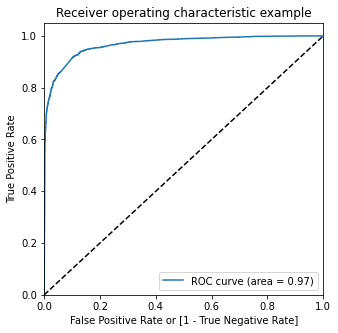

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [138]:
#The ROC Curve should be a value close to 1. We got 0.97 indicating a good predictive model.

In [139]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.136237,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.015084,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.145891,3274,0,1,1,0,0,0,0,0,0,0,0
3,0,0.001874,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.995928,1667,1,1,1,1,1,1,1,1,1,1,1


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.817935  0.971908  0.723338
0.2   0.2  0.882879  0.948847  0.842349
0.3   0.3  0.900910  0.925786  0.885626
0.4   0.4  0.912717  0.857023  0.946935
0.5   0.5  0.911600  0.833543  0.959557
0.6   0.6  0.908409  0.808805  0.969603
0.7   0.7  0.900750  0.775262  0.977846
0.8   0.8  0.893569  0.744235  0.985317
0.9   0.9  0.882879  0.706080  0.991499


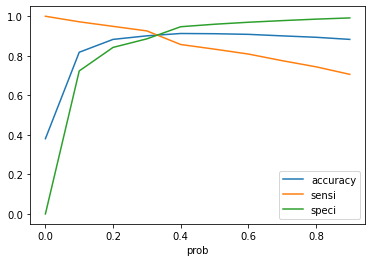

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [142]:
#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.136237,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.015084,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.145891,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.001874,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.995928,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.136237,9196,0,14
1,0,0.015084,4696,0,2
2,0,0.145891,3274,0,15
3,0,0.001874,2164,0,0
4,1,0.995928,1667,1,100


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9114408808042126

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3661,  221],
       [ 334, 2051]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.859958071278826

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.9430705821741371

In [150]:
#Observation:
#We can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
#Accuracy : 91.1%
#Sensitivity : 86%
#Specificity : 94%


In [151]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05692941782586296


In [152]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9027288732394366


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.91639549436796


In [154]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3661,  221],
       [ 334, 2051]], dtype=int64)

In [155]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9027288732394366

In [156]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.859958071278826

In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9027288732394366

In [159]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.859958071278826

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

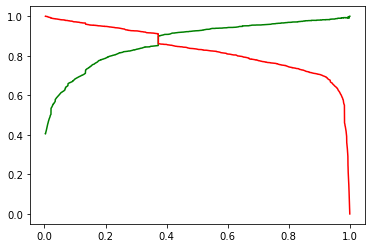

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [164]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
984,-0.550262,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8135,0.812462,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6915,-0.628665,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [165]:
X_test_sm = sm.add_constant(X_test)

In [166]:
#PREDICTIONS ON TEST SET
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

7681    0.011237
984     0.005640
8135    0.388081
6915    0.010472
2712    0.975085
244     0.012524
4698    0.004422
8287    0.020697
6791    0.992217
8970    0.011461
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred_1.head()

,0
7681,0.011237
984,0.005640
8135,0.388081
6915,0.010472
2712,0.975085


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [172]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.011237
1,0,984,0.005640
2,0,8135,0.388081
3,0,6915,0.010472
4,1,2712,0.975085


In [175]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [176]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.011237
1,0,984,0.005640
2,0,8135,0.388081
3,0,6915,0.010472
4,1,2712,0.975085


In [177]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [178]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.011237,1
1,984,0,0.005640,1
2,8135,0,0.388081,39
3,6915,0,0.010472,1
4,2712,1,0.975085,98


In [183]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.39 else 0)

In [184]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.011237,1,0
1,984,0,0.005640,1,0
2,8135,0,0.388081,39,0
3,6915,0,0.010472,1,0
4,2712,1,0.975085,98,1


In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9169769173492182

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1597,   79],
       [ 144,  866]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8574257425742574

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9528639618138425

In [190]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9164021164021164

In [191]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8574257425742574

In [193]:
#Observation:
#After running the model on the Test Data these are the figures we obtain:

#Accuracy : 91.7%
#Sensitivity : 85.7%
#Specificity : 95.2%